In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
import numpy as np
%matplotlib inline

In [2]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

# Load model trained with caffe pretrained model

In [3]:
trainer.load('./checkpoints/fasterrcnn_02071907_0.7010876357676961')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model

In [4]:
img = read_image('misc/demo.jpg')
img = t.from_numpy(img)[None]

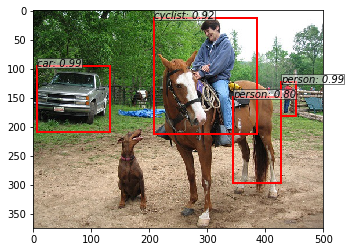

In [5]:
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

# Display a Kitti image

In [6]:
img = read_image('/home/tadenoud/Documents/kitti/data_object_image_2/training/image_2/005009.png')
img = t.from_numpy(img)[None]

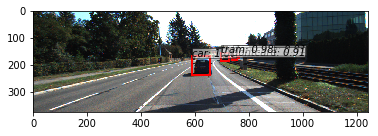

In [7]:
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

In [8]:
# Read a Kitti GT label
from data.util import read_bbox

gt_bboxes, gt_labels = read_bbox('/home/tadenoud/Documents/kitti/data_object_label_2/training/label_2/005009.txt')

In [9]:
# bbx, scs, rois = trainer.faster_rcnn.train_ood(img, gt_bboxes, gt_labels, visualize=True)
# rpn_locs, rpn_scores, rois, roi_indices, anchor = trainer.faster_rcnn.train_ood(img, bboxes, labels, visualize=True)
rois, features = trainer.faster_rcnn.train_ood(img, gt_bboxes, gt_labels, visualize=True)


In [12]:
features

tensor([[0.2217, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.3434, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       device='cuda:0')

In [ ]:
show = 3

print("ROIS")
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(rois[:show]))

# print("Regressed output")
# vis_bbox(at.tonumpy(img[0]),
#          np.array(bbx[0])[:show,6,:].reshape((-1,4)))

# print("GT boxes")
# vis_bbox(at.tonumpy(img[0]),
#          at.tonumpy(gt_bboxes))

In [ ]:
# gt_bboxes = gt_bboxes                        (3, 4)

# gt_labels                                    (3)

n_classes = 21

# bbxs = regressed model outputs               (1, 300, 21, 4)

# rois = scaled rois to match img dimensions   (300, 4)

# scs = raw probability scores by class        (1, 300, 21)

In [ ]:
np.array(bbx).shape

In [ ]:
bbx = bbx[0]
scs = scs[0]

In [ ]:
# TODO
# For each gt_bbox:
    # Get the roi with max IOU (Accounting for label), by using the regressed bboxes
    
from model.utils.bbox_tools import bbox_iou
    
max_idxs = [bbox_iou(np.array([b]), bbx[:,l]).argmax() for b, l in zip(gt_bboxes, gt_labels)]
closest_rois = rois[max_idxs]

In [ ]:
print(max_idxs)
closest_rois